In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [243]:
df=pd.read_csv('/home/shnitzel/Desktop/assignment7-8/ADS-Assignment-7-8/insurance.csv')
df.head(20)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [244]:
df.isnull().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [246]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


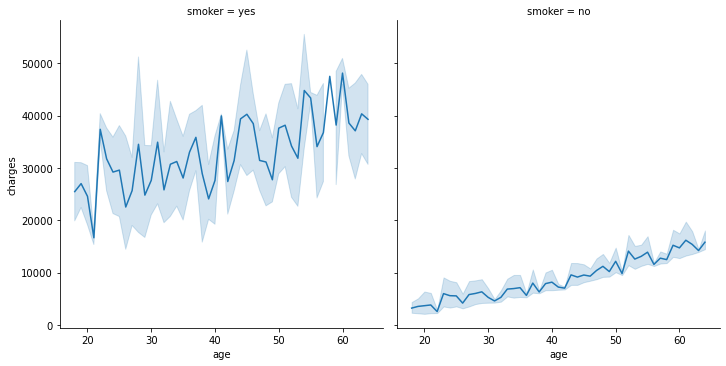

In [247]:
sns.relplot(
    data=df, kind="line",
    x="age", y="charges", col='smoker'
)

In [248]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [249]:

numerical_continuous = df[['age','bmi','charges','children']]
numerical_discreat = df[['sex','smoker','region']]



In [250]:
numerical_continuous.head()

,age,bmi,charges,children
0,19,27.900,16884.92400,0
1,18,33.770,1725.55230,1
2,28,33.000,4449.46200,3
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0


<AxesSubplot:>

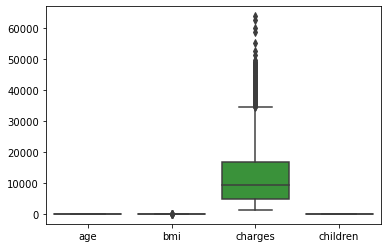

In [251]:
sns.boxplot(data=numerical_continuous)

In [252]:
numerical_continuous['zscore'] = (numerical_continuous.charges - numerical_continuous.charges.mean()) / numerical_continuous.charges.std()
numerical_continuous['zscore_bmi'] = (numerical_continuous.bmi - numerical_continuous.bmi.mean()) / numerical_continuous.bmi.std()

<ipython-input-252-78f36dd6099b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_continuous['zscore'] = (numerical_continuous.charges - numerical_continuous.charges.mean()) / numerical_continuous.charges.std()
<ipython-input-252-78f36dd6099b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_continuous['zscore_bmi'] = (numerical_continuous.bmi - numerical_continuous.bmi.mean()) / numerical_continuous.bmi.std()


In [253]:
numerical_continuous_no_outliers = numerical_continuous[(numerical_continuous.zscore > -1) & (numerical_continuous.zscore < 0.8)
& (numerical_continuous.zscore_bmi > -2) & (numerical_continuous.zscore_bmi < 1.75)                                                    ]
numerical_continuous_no_outliers.head()

,age,bmi,charges,children,zscore,zscore_bmi
0,19,27.900,16884.92400,0,0.298472,-0.453151
1,18,33.770,1725.55230,1,-0.953333,0.509431
2,28,33.000,4449.46200,3,-0.728402,0.383164
3,33,22.705,21984.47061,0,0.719574,-1.305043
4,32,28.880,3866.85520,0,-0.776512,-0.292447


<AxesSubplot:>

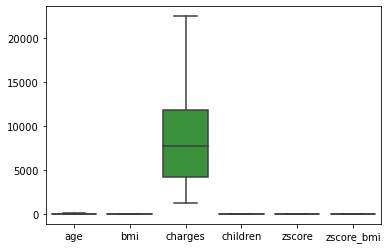

In [254]:
sns.boxplot(data=numerical_continuous_no_outliers)

In [255]:
categorical = list(numerical_discreat.columns)

In [256]:
numerical_discreat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   smoker  1338 non-null   object
 2   region  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [257]:
df = df[['sex', 'smoker', 'region']].apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     1338 non-null   category
 1   smoker  1338 non-null   category
 2   region  1338 non-null   category
dtypes: category(3)
memory usage: 4.4 KB


In [258]:
numerical_discreat = df[['sex','smoker','region']]
numerical_discreat['sex'] =  numerical_discreat['sex'].cat.codes
numerical_discreat['smoker'] =  numerical_discreat['smoker'].cat.codes
numerical_discreat['region'] =  numerical_discreat['region'].cat.codes

In [259]:
numerical_discreat.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [260]:
new_df = pd.concat([numerical_discreat, numerical_continuous_no_outliers], axis=1)

In [261]:
new_df.head()

,sex,smoker,region,age,bmi,charges,children,zscore,zscore_bmi
0,0,1,3,19.0,27.900,16884.92400,0.0,0.298472,-0.453151
1,1,0,2,18.0,33.770,1725.55230,1.0,-0.953333,0.509431
2,1,0,2,28.0,33.000,4449.46200,3.0,-0.728402,0.383164
3,1,0,1,33.0,22.705,21984.47061,0.0,0.719574,-1.305043
4,1,0,1,32.0,28.880,3866.85520,0.0,-0.776512,-0.292447


In [262]:

new_df=new_df.drop(columns=['children','zscore','zscore_bmi'])

In [263]:
new_df.head()

,sex,smoker,region,age,bmi,charges
0,0,1,3,19.0,27.900,16884.92400
1,1,0,2,18.0,33.770,1725.55230
2,1,0,2,28.0,33.000,4449.46200
3,1,0,1,33.0,22.705,21984.47061
4,1,0,1,32.0,28.880,3866.85520


In [264]:
target = new_df['charges']

In [265]:
feature = new_df[['sex','smoker','region','age','bmi']]

In [266]:
target.to_csv('/home/shnitzel/Desktop/assignment7-8/ADS-Assignment-7-8/target.csv',index=False)
feature.to_csv('/home/shnitzel/Desktop/assignment7-8/ADS-Assignment-7-8/feature.csv',index=False)